# Netflix Business Case Study

### Importing all required packages

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

### Loading NETFLIX dataset

In [182]:
netflix = pd.read_csv("netflix.csv")

netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Question 1 

### Defining Problem Statement and Analyzing basic metrics


**So this is our problem statement** - 
Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.

- Let's further break the problem statement in sub problems -
    - Questions we are trying to answer after analyzing and exploring the dataset
        - How has the number of movies released per year changed over the last 20-30 years?
        - Comparison of tv shows vs. movies.
        - What is the best time to launch a TV show?
        - Analysis of actors/directors of different types of shows/movies.
        - Does Netflix has more focus on TV Shows than movies in recent years
        - Understanding what content is available in different countries
        - What type of content is available in different countries?


**To Solve The Above Problem** - We will be keep the following basic metrics in our mind while doing exploration and visualization. We will dealing with more categorical features than numerical features. 
- Growing trends in TV Show content - we will analyze using year vs count plot through Lineplot
- Distribution of content - count of different category overall using value_counts()
- To get more insights from date_added column, we derive year and month analysis for content distribution year on year or month on month
- There are condensed or glacier data for actor, director, country or genre which needs to be decomposed to get better insights for the famous actor & director. 
- To get better understanding of average runtime duration of movie and seasons count for TV Shows - We will look into distribution plot to get the better understanding
- Key Metrics - `frequency of content adding`, `statistical summary of content release`, `correlation between content adding and month`, `Rating ages analysis using masking of rating`, `distribution of content in different countries`

## Question 2

### Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary (10 Points)


In [183]:
print("The shape of dataset is", netflix.shape, f" | Number of Datapoints: {netflix.shape[0]} | Number of columns: {netflix.shape[1]}")

The shape of dataset is (8807, 12)  | Number of Datapoints: 8807 | Number of columns: 12


In [184]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### Datatypes
 - Int 1
 - Object(str) 11
 
`Thus we can conclude the dataset is more categorically feature oriented`

###### We can convert datatype of type attribute to category data type

In [185]:
netflix["type"] = netflix["type"].astype("category")

Lets check the updated attributes

In [186]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       8807 non-null   object  
 1   type          8807 non-null   category
 2   title         8807 non-null   object  
 3   director      6173 non-null   object  
 4   cast          7982 non-null   object  
 5   country       7976 non-null   object  
 6   date_added    8797 non-null   object  
 7   release_year  8807 non-null   int64   
 8   rating        8803 non-null   object  
 9   duration      8804 non-null   object  
 10  listed_in     8807 non-null   object  
 11  description   8807 non-null   object  
dtypes: category(1), int64(1), object(10)
memory usage: 765.7+ KB


### Missing value detection

There is missing values in the director, cast, country, data_added, rating, duration

In [187]:
netflix.isnull().sum().sort_values()

show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
duration           3
rating             4
date_added        10
cast             825
country          831
director        2634
dtype: int64

`director` column contains most `NA` values. We can fix it using best impuatation methods

### Statistical Summary

- Numerical 

In [188]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


- Categorical

In [189]:
netflix.describe(include = ["object", "category"])

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


### By Seeing the frequency we can conclude the following inferences (Pre Processed)- 

- Top Category : Movie
- Top Cast : David Attenborough
- Top Country  : US
- Top Rated    : TV-MA
- Top Listed   : Dramas, Intl Movies

## Question 6 - Missing Values Treatment

### Missing value imputation

In [190]:
netflix['director'] = netflix['director'].fillna('NoDataAvailable')
netflix['country'] = netflix['country'].fillna(netflix['country'].mode()[0])
netflix['cast'] = netflix['cast'].fillna('NoDataAvailable')
netflix['date_added'] = netflix['date_added'].fillna(netflix['date_added'].mode()[0])
netflix['rating'] = netflix['rating'].fillna(netflix['rating'].mode()[0])
netflix["duration"] = netflix["duration"].fillna('NoDataAvailable')

Imputing the mode of `country`, `date_added`, and `rating` features for unavailable data, However for `director` and `cast` is more 
information oriented so we imputed `No data available`

### After Imputation

In [191]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Question 3: Non-Graphical Analysis

In [192]:
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NoDataAvailable,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NoDataAvailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NoDataAvailable,NoDataAvailable,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NoDataAvailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, JosÃ© Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


### Content Type on Netflix

In [193]:
netflix["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

#### `Insights`
- There are two unique category `Movie` & `TV Show`
- Movies are dominant content on netflix platform

### Most Number of Release per Year

In [194]:
netflix["release_year"].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

#### `Insights`
- Content released in range of 74 unique years between `1925` - `2021`
- Most of the content released in year `2018`

### Analysis of content being added on Netflix platform


In [195]:
netflix["date_added"] = pd.to_datetime(netflix["date_added"])

netflix["year_added"] = netflix["date_added"].dt.year
netflix["month_added"] = netflix["date_added"].dt.month

netflix["year_added"].value_counts().sort_index()

2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     429
2017    1188
2018    1649
2019    2016
2020    1889
2021    1498
Name: year_added, dtype: int64

#### `Insights`
- Contents added on platform from `2010` to `2021`
- Most of the contents being added in year `2019`

In [196]:
netflix["month_added"].value_counts()

7     827
12    813
9     770
4     764
10    760
8     755
1     748
3     742
6     728
11    705
5     632
2     563
Name: month_added, dtype: int64

#### `Insights`
- Most of the content being added in month of `July(7)`

Let's check any particular date on which content is added in bulk

In [197]:
netflix["date_added"].value_counts()

2020-01-01    120
2019-11-01     91
2018-03-01     75
2019-12-31     74
2018-10-01     71
             ... 
2017-02-21      1
2017-02-07      1
2017-01-29      1
2017-01-25      1
2020-01-11      1
Name: date_added, Length: 1714, dtype: int64

#### `Insights`
- There are total of `1714` unique dates on which contents being added on platform
- We can say 120 contents has been added on particular date `2020-01-01`

### Analysis of Different Ratings

Let's create `rating ages` column derived from `rating` column

In [198]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix["ratings_ages"]=netflix["rating"].replace(ratings_ages)

In [199]:
netflix["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

#### Data from `duration` column appeared in rating for 3 datapoints.
Let's sanitise that

In [200]:
temp = netflix.loc[netflix["rating"].str.contains("min")] 

temp["duration"] =  temp["rating"]


In [201]:
temp["rating"] = netflix["rating"].mode()[0]
temp["ratings_ages"] = temp["rating"]
temp["ratings_ages"] = temp["rating"].replace(ratings_ages)

temp

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,ratings_ages
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,TV-MA,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017,4,Adults
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,TV-MA,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016,9,Adults
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,TV-MA,66 min,Movies,The comic puts his trademark hilarious/thought...,2016,8,Adults


In [202]:
netflix.loc[netflix["rating"].str.contains("min")] = temp

Let's check our data is sanitized or not

In [203]:
netflix.loc[netflix["rating"].str.contains("min")].shape

(0, 15)

#### Our rating data is sanitised now. Let's start analysis

In [204]:
netflix["rating"].value_counts()

TV-MA       3214
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

#### `Insights`
- There are 14 different ratings for all the content available on Netflix
- Most of the content being rated `TV-MA` & `TV-14`

#### Let's check the `ratings age` analysis

In [205]:
netflix["ratings_ages"].value_counts()

Adults        4099
Teens         2650
Older Kids    1490
Kids           568
Name: ratings_ages, dtype: int64

#### `Insights`
- There are 4 different ratings ages available for the contents
- As per `ratings_ages` most of the content available for `Adults` & `Teens`

### Avg Duration of Movies and TV shows

In [206]:
netflix["duration"].isnull().sum()

0

In [207]:
netflix["duration"].dtype

dtype('O')

In [208]:
netflix["duration"] = netflix["duration"].apply(lambda x: str(x).split(" ")[0])
netflix["duration"] = netflix["duration"].astype("int")

netflix["duration"].dtype

dtype('int32')

In [209]:
netflix.groupby(["type"])["duration"].mean()

type
Movie      99.564998
TV Show     1.764948
Name: duration, dtype: float64

#### `Insights`
- Avg runtime of `movie` is `99.56` minutes
- Avg seasons of `TV Show` is `>1.5` season

### Unnesting Condensed Data (Actors, Directors, Listed_in, Country)

### Unnesting Actors

### Famous Actors in TV Shows & Movies

In [210]:
temp = list()
clean_data = netflix.loc[netflix["cast"] != "NoDataAvailable"]
# clean_data.reset_index(inplace=True)
for ind, element in clean_data.iterrows():
    type_show = element['type']
    for _cast in str(element['cast']).split(','):
        temp.append([type_show, _cast])
cast_data = pd.DataFrame(temp, columns= ['type', 'cast'])


cast = cast_data.value_counts().to_frame()
cast.reset_index(level=[0,1], inplace=True)
cast = cast.rename(columns = {0:'count'})
cast

,type,cast,count
0,Movie,Anupam Kher,38
1,Movie,Rupa Bhimani,27
2,Movie,Om Puri,27
3,Movie,Shah Rukh Khan,26
4,Movie,Paresh Rawal,25
...,...,...,...
43375,Movie,Olaf Lubaszenko,1
43376,Movie,Oladele Ogunlana,1
43377,Movie,Ola Ghanem,1
43378,Movie,OkÅŸan BÃ¼yÃ¼k,1


### Famous cast in TV Show

In [211]:
cast.loc[cast["type"] == "TV Show"].sort_values(["count"], ascending = False).reset_index(drop = True)

,type,cast,count
0,TV Show,Takahiro Sakurai,24
1,TV Show,Ai Kayano,17
2,TV Show,Yuki Kaji,17
3,TV Show,Junichi Suwabe,17
4,TV Show,David Attenborough,14
...,...,...,...
15496,TV Show,Vera Spinetta,1
15497,TV Show,Verdi Solaiman,1
15498,TV Show,VerÃ³nica Bravo,1
15499,TV Show,Vered Feldman,1


### `Insights`
- `Takahiro Sakurai` is the top cast in TV Show Category

### Famous cast in Movies

In [212]:
cast.loc[cast["type"] == "Movie"].sort_values(["count"], ascending = False).reset_index(drop = True)

,type,cast,count
0,Movie,Anupam Kher,38
1,Movie,Om Puri,27
2,Movie,Rupa Bhimani,27
3,Movie,Shah Rukh Khan,26
4,Movie,Paresh Rawal,25
...,...,...,...
27874,Movie,Arlene Muchlach,1
27875,Movie,Arkie Kandola,1
27876,Movie,Arkanda Saezario Wicaksono,1
27877,Movie,Arkady Sharogradsky,1


### `Insights`
- `Anupam Kher` is the top cast in Movies Category

### Unnesting Directors

### Famous Director in Movie/TV Show

In [213]:
temp = list()
clean_data = netflix.loc[netflix["director"] != "NoDataAvailable"]
# clean_data.reset_index(inplace=True)
for ind, element in clean_data.iterrows():
    type_show = element['type']
    for _cast in str(element['director']).split(','):
        temp.append([type_show, _cast])
director_data = pd.DataFrame(temp, columns= ['type', 'director'])


director = director_data.value_counts().to_frame()
director.reset_index(level=[0,1], inplace=True)
director = director.rename(columns = {0:'count'})
director

,type,director,count
0,Movie,Rajiv Chilaka,22
1,Movie,RaÃºl Campos,18
2,Movie,Jan Suter,18
3,Movie,Suhas Kadav,16
4,Movie,Jay Karas,15
...,...,...,...
5181,Movie,Floria Sigismondi,1
5182,Movie,Fisher Stevens,1
5183,Movie,Filip Zylber,1
5184,Movie,Filip Renc,1


### Famous director in movies category

In [214]:
director.loc[director["type"] == "Movie"].sort_values(["count"], ascending = False).reset_index(drop = True)

,type,director,count
0,Movie,Rajiv Chilaka,22
1,Movie,Jan Suter,18
2,Movie,RaÃºl Campos,18
3,Movie,Suhas Kadav,16
4,Movie,Jay Karas,15
...,...,...,...
4881,Movie,Phil Johnston,1
4882,Movie,Phil Lord,1
4883,Movie,Phil Morrison,1
4884,Movie,Phil Nibbelink,1


### `Insights`
- `Rajiv Chilaka` is the top cast in Movie Category

### Famous director in TV Shows category

In [215]:
director.loc[director["type"] == "TV Show"].sort_values(["count"], ascending = False).reset_index(drop = True)

,type,director,count
0,TV Show,Alastair Fothergill,3
1,TV Show,Ken Burns,3
2,TV Show,Shin Won-ho,2
3,TV Show,Iginio Straffi,2
4,TV Show,Hsu Fu-chun,2
...,...,...,...
295,TV Show,Onur ÃœnlÃ¼,1
296,TV Show,Obi Emelonye,1
297,TV Show,Neslihan Yesilyurt,1
298,TV Show,Nizar Shafi,1


### `Insights`
- `Alastair Fothergill` is the top cast in TV Show Category

### Unnesting countries

### Countries with most number of contents

In [216]:
temp = list()
clean_data = netflix.loc[netflix["country"] != "NoDataAvailable"]
# clean_data.reset_index(inplace=True)
for ind, element in clean_data.iterrows():
    type_show = element['type']
    for _cast in str(element['country']).split(','):
        temp.append([type_show, _cast])
country_data = pd.DataFrame(temp, columns= ['type', 'country'])


country = country_data.value_counts().to_frame()
country.reset_index(level=[0,1], inplace=True)
country = country.rename(columns = {0:'count'})
country

,type,country,count
0,Movie,United States,2804
1,TV Show,United States,1238
2,Movie,India,927
3,Movie,United States,388
4,Movie,United Kingdom,382
...,...,...,...
284,TV Show,Hungary,1
285,Movie,Slovakia,1
286,TV Show,Finland,1
287,TV Show,Egypt,1


### Top Countries in number of TV Shows category

In [217]:
country.loc[country["type"] == "TV Show"].sort_values(["count"], ascending = False).reset_index(drop = True)

,type,country,count
0,TV Show,United States,1238
1,TV Show,United Kingdom,246
2,TV Show,Japan,174
3,TV Show,South Korea,164
4,TV Show,United States,91
...,...,...,...
97,TV Show,Switzerland,1
98,TV Show,Croatia,1
99,TV Show,Cyprus,1
100,TV Show,United Arab Emirates,1


### `Insights`
- `United States` is the top country in TV Show Category

### Top Countries in number of Movie

In [218]:
country.loc[country["type"] == "Movie"].sort_values(["count"], ascending = False).reset_index(drop = True)

,type,country,count
0,Movie,United States,2804
1,Movie,India,927
2,Movie,United States,388
3,Movie,United Kingdom,382
4,Movie,Canada,187
...,...,...,...
182,Movie,Namibia,1
183,Movie,Mongolia,1
184,Movie,Montenegro,1
185,Movie,Syria,1


### `Insights`
- `United States` is the top cast in Movie Category

### Unnesting Listed_in(Genre)

### Top Genre in recent years

In [219]:
temp = list()
clean_data = netflix.loc[netflix["country"] != "NoDataAvailable"]
clean_data.reset_index(inplace=True)
for ind, element in clean_data.iterrows():
    year = element['release_year']
    for _cast in str(element['listed_in']).split(','):
        temp.append([year, _cast])
genre_data = pd.DataFrame(temp, columns= ['release_year', 'genre'])
genre = genre_data.value_counts().to_frame()
genre.reset_index(level=[0,1], inplace=True)
genre = genre.rename(columns = {0:'count'})
genre

,release_year,genre,count
0,2018,International Movies,328
1,2017,International Movies,316
2,2016,International Movies,288
3,2019,International Movies,258
4,2020,International Movies,225
...,...,...,...
1564,2015,Documentaries,1
1565,1999,Thrillers,1
1566,1999,Teen TV Shows,1
1567,1999,TV Dramas,1


### `Insights` 
- `International Movies` is top `genre` having released in year `2018` most number of times 

## Question 4.  Visual Analysis

### Distribution of content

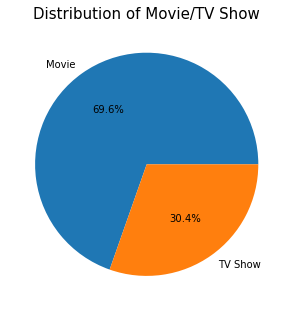

In [220]:
bar, ax = plt.subplots(figsize = (5,10))
plt.pie(netflix['type'].value_counts(), labels = netflix['type'].value_counts().index, autopct="%.1f%%")
plt.title('Distribution of Movie/TV Show', size=15)
plt.show()

### `Insights`
- `Movie` is the top content available on Netflix

### Release of content over last 5 year

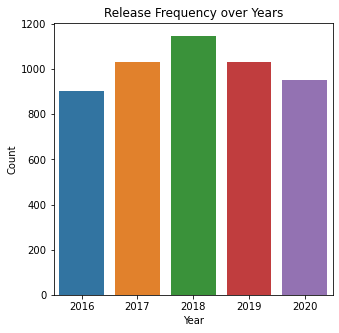

In [221]:
bar, ax = plt.subplots(figsize = (5,5))
sns.barplot(x = netflix['release_year'].value_counts().index[:5], y = netflix['release_year'].value_counts()[:5])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Release Frequency over Years')
plt.show()

### `Insights`
- `2018` is most productive year showing most number of content release in that year.
- After `2018` there is decrement in the content release observed. Most probable reason is due to covid

## Year on Year Content Adding on Netflix

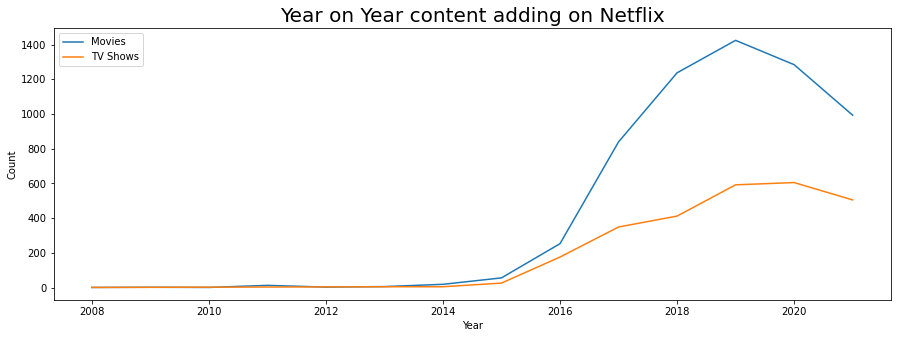

In [222]:
movies = netflix.loc[netflix["type"] == "Movie"]
shows = netflix.loc[netflix["type"] == "TV Show"]

plt.figure(figsize=(15, 5))
plt.title("Year on Year content adding on Netflix", size = 20)
sns.lineplot(x=movies["year_added"].value_counts().index, y = movies["year_added"].value_counts().values)
sns.lineplot(x=shows["year_added"].value_counts().index, y = shows["year_added"].value_counts().values)
plt.xlabel('Year')
plt.ylabel("Count")
plt.legend(["Movies", "TV Shows"], loc = "upper left")
plt.show()

### `Insights`
- After year 2018 there is strict down trend observed in the movie categor in comparison with TV Show

## Month on Month Content Adding Analysis

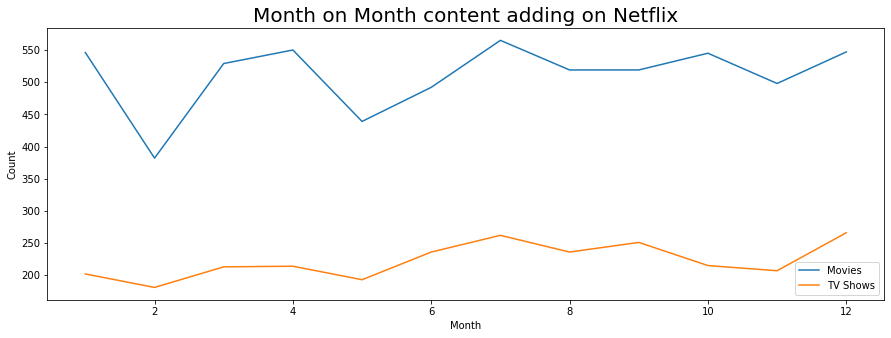

In [223]:
movies = netflix.loc[netflix["type"] == "Movie"]
shows = netflix.loc[netflix["type"] == "TV Show"]

plt.figure(figsize=(15, 5))
plt.title("Month on Month content adding on Netflix", size = 20)
sns.lineplot(x=movies["month_added"].value_counts().index, y = movies["month_added"].value_counts().values)
sns.lineplot(x=shows["month_added"].value_counts().index, y = shows["month_added"].value_counts().values)
plt.xlabel('Month')
plt.ylabel("Count")
plt.legend(["Movies", "TV Shows"], loc = "best")
plt.show()

### `Insights`
- Global Maxima point observed in the month of `July(7)` for `movies` however `December(12)` for `TV Shows`. In these months netflix added most of the content
- Global Minimum point observed in the month of `February(2)` both categories (Movies & TV Shows)

## Trend Analysis: Growth of Movie/TV Show over Years

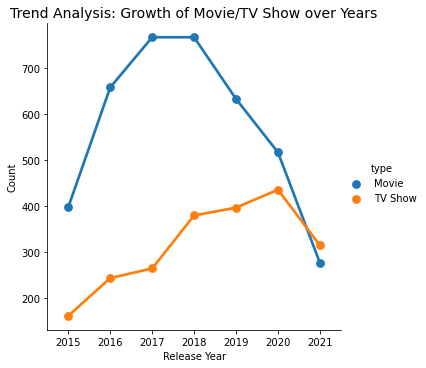

In [224]:
movie_data = netflix[netflix['type'] == 'Movie']
tv_show_data = netflix[netflix['type'] == 'TV Show']
# bar,ax = plt.subplots(1,2,figsize=(15,5))
temp = netflix[['type', 'release_year']]
temp = temp.value_counts().to_frame()
temp.reset_index(level=[0,1], inplace=True)
temp = temp.rename(columns = {0:'count'})
temp = pd.concat([temp[temp['type'] == 'Movie'][:7], temp[temp['type']== 'TV Show'][:7]])

sns.catplot(x = 'release_year', y = 'count', hue = 'type', data = temp, kind = 'point')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Trend Analysis: Growth of Movie/TV Show over Years', size=14)
plt.show()

### `Insights`
- In recent year TV shows showing growing trend irrespective of global pandemic
- In recent year Movies shows down trend.
- We can say that, Netflix has more focus on TV Shows than movies in recent years

### Movie Runtime Analysis 

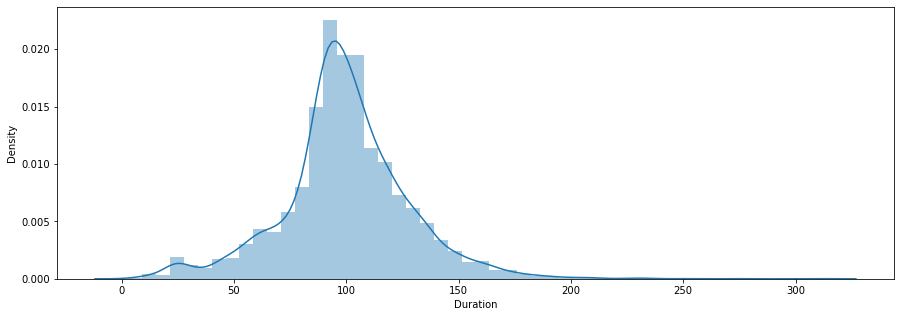

In [225]:
temp = netflix.loc[netflix['type'] == 'Movie'].reset_index()
bar, ax = plt.subplots(figsize = (15,5))
sns.distplot(a = temp['duration'])
plt.xlabel('Duration')
plt.show()

### `Insights`
- `99.56` (~ 100 minutes) is average Runtime of movie

### TV Shows Average Runtime Analysis

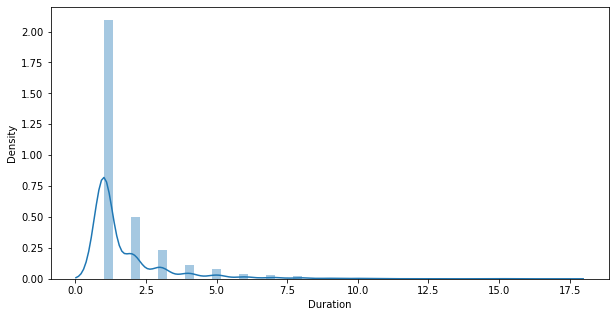

In [226]:
temp = netflix.loc[netflix['type'] == 'TV Show'].reset_index()
bar, ax = plt.subplots(figsize = (10,5))
sns.distplot(a = temp['duration'])
plt.xlabel('Duration')
plt.show()

### `Insights`
- Average number of `seasons` is 1.7 `(~2 Seasons)`

## Famous Directors

### In Movies

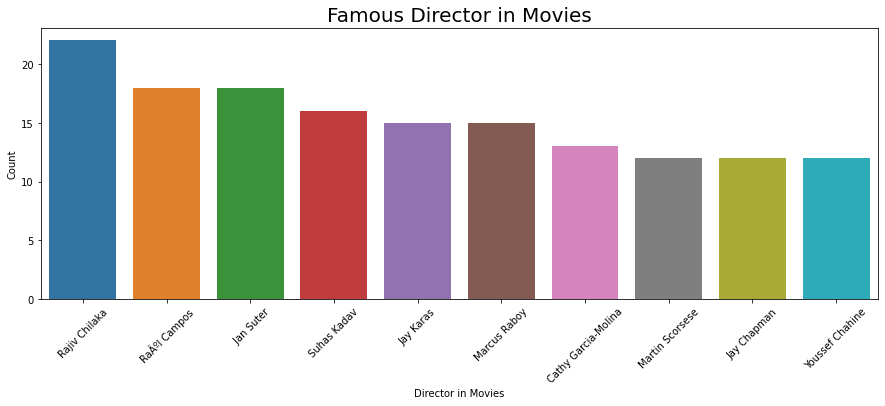

In [227]:
bar, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = 'director', y = 'count', data = director[director['type'] == "Movie"].iloc[:10])
plt.xticks(rotation = 45)
plt.xlabel('Director in Movies')
plt.ylabel('Count')
plt.title('Famous Director in Movies', size=20)

plt.show()

### In TV Shows

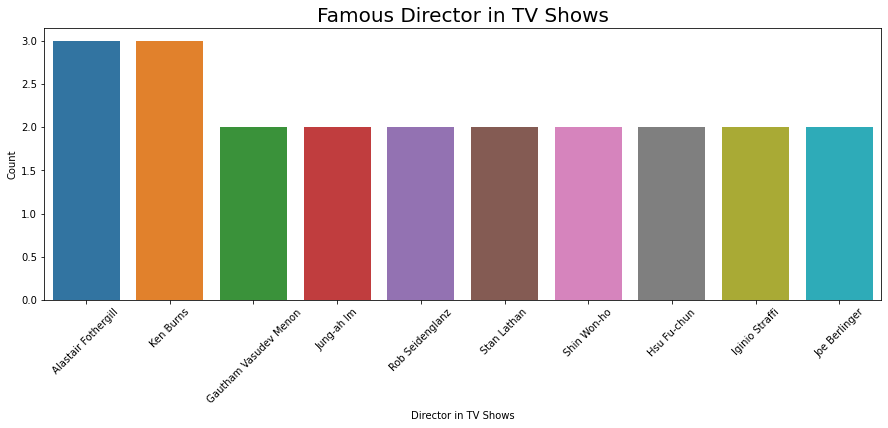

In [228]:
bar, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = 'director', y = 'count', data = director[director['type'] == "TV Show"].iloc[:10])
plt.xticks(rotation = 45)
plt.xlabel('Director in TV Shows')
plt.ylabel('Count')
plt.title('Famous Director in TV Shows', size=20)

plt.show()

### Content Distribution based on Countries

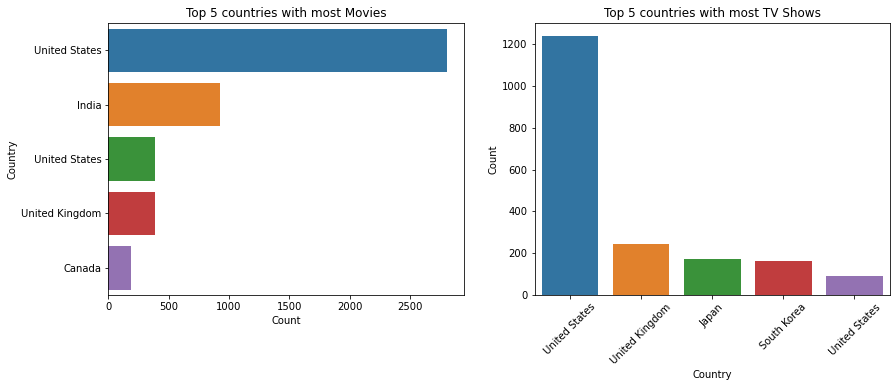

In [229]:
bar, ax = plt.subplots(1,2, figsize=(14,5))
sns.barplot(x = 'count', y ='country', data = country[country['type'] == "Movie"].iloc[:5,:], ax = ax[0])
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Country')
ax[0].set_title('Top 5 countries with most Movies')
sns.barplot(x = 'country', y = 'count', data = country[country['type'] == 'TV Show'].iloc[:5,:], ax = ax[1])
plt.xticks(rotation = 45)
ax[1].set_xlabel('Country')
ax[1].set_ylabel('Count')
ax[1].set_title('Top 5 countries with most TV Shows')
plt.show()

### `Insights`
- US is topping the charts in distribution of contents in both category Movies and TV Shows as well

## Rating Analysis

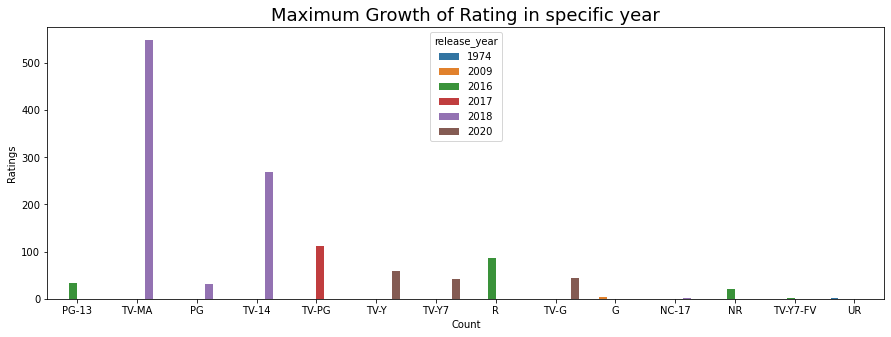

In [230]:
temp = netflix[['release_year', 'rating']]
temp = temp.value_counts().to_frame()
temp.reset_index(level =  [0,1], inplace = True)
temp = temp.rename(columns = {0:'count'})
rating = pd.DataFrame([],columns = ('release_year', 'rating', 'count'))
for rating_element in netflix['rating'].unique():
    rating = pd.concat([rating, temp[temp['rating'] == rating_element].iloc[:1,:]])
    
plt.figure(figsize=(15,5))
sns.barplot(y = 'count', x ='rating', data = rating, hue = 'release_year')
plt.xlabel('Count')
plt.ylabel('Ratings')
plt.title('Maximum Growth of Rating in specific year', size=18)
plt.show()

### `Insights`
- Year 2018 shows bigger spikes for TV-MA ratings

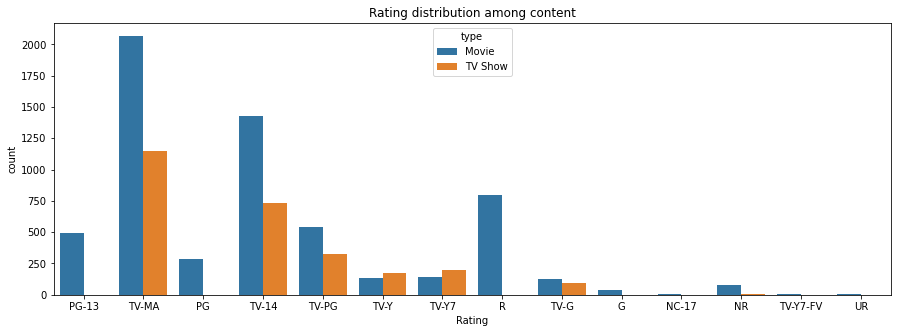

In [231]:
plt.figure(figsize=(15, 5))

sns.countplot(x="rating", hue="type",data=netflix)
plt.title("Rating distribution among content")
plt.xlabel("Rating")
plt.show()

### `Insights`
- TV-MA is top rated content for both category

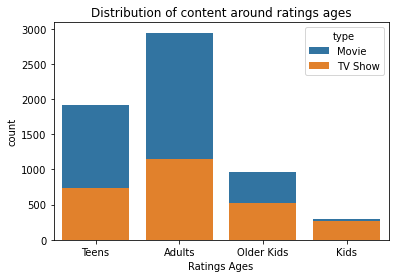

In [232]:
sns.countplot(x="ratings_ages", hue="type",data=netflix, dodge=False)
plt.title("Distribution of content around ratings ages")
plt.xlabel("Ratings Ages")
plt.show()

### `Insights`
- Most of the content lies under `Adults` rating age

### Top Genre in last 10 Years

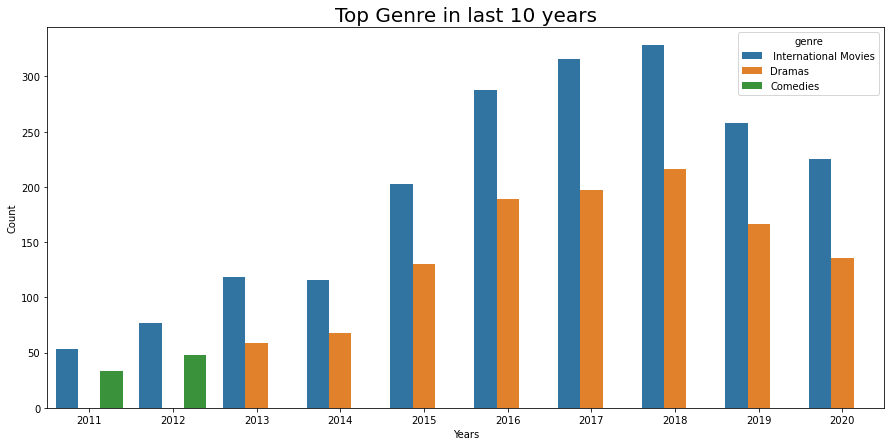

In [233]:
years = [2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011]
year_data = list()
for year in years:
    temp1 = genre.loc[genre['release_year'] == year].iloc[0,:]
    temp2 = genre.loc[genre['release_year'] == year].iloc[1,:]
    year_data.append(list(temp1))
    year_data.append(list(temp2))
    
year = pd.DataFrame(year_data, columns=('years', 'genre', 'count'))

bar, ax = plt.subplots(figsize=(15,7))
sns.barplot(x = 'years', y ='count', hue='genre', data = year)
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Top Genre in last 10 years', size=20)
plt.show()

### `Insights`
- From year 2015 to 2018 both categories shows growing trend
- After year 2018 there is significant drop observed may be due to covid

## Actors Analysis

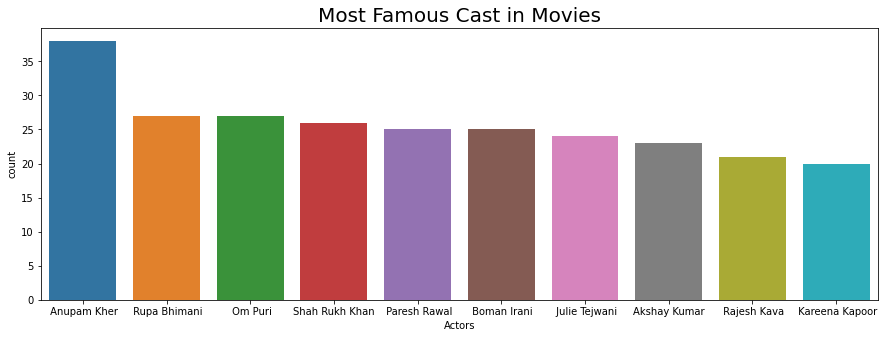

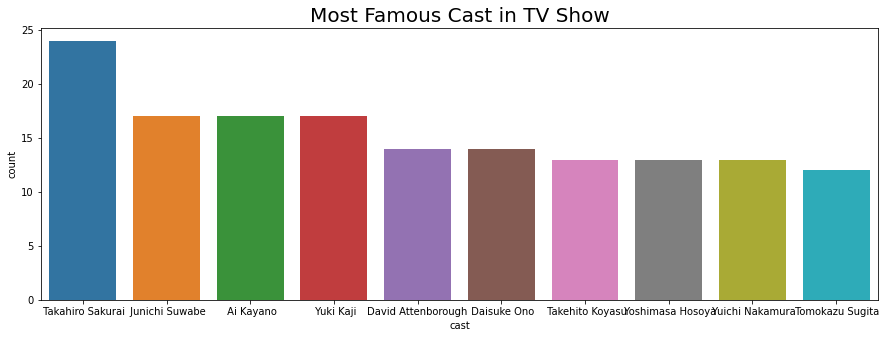

In [234]:

plt.subplots(figsize= (15,5))


sns.barplot(y = cast['count'][cast['type'] == 'Movie'][:10] , x = cast['cast'][cast['type'] == 'Movie'][:10], data = cast)
plt.title('Most Famous Cast in Movies', size=20)
plt.xlabel("Actors")
plt.subplots(figsize= (15,5))
sns.barplot(y = cast['count'][cast['type'] == 'TV Show'][:10] , x = cast['cast'][cast['type'] == 'TV Show'][:10], data = cast)
plt.title('Most Famous Cast in TV Show', size=20)

plt.show()

### `Insights`
- `Anupam Kher` is famous actor in Movies Category
- `Takahiro Sakurai` is famous cast in TV Shows

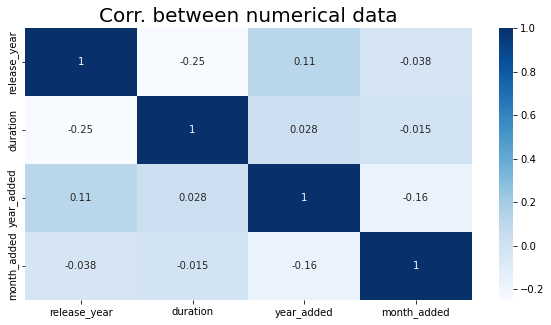

In [235]:
plt.figure(figsize = (10, 5))
sns.heatmap(netflix.corr(), annot = True, cmap = "Blues")
plt.title("Corr. between numerical data", size = 20)
plt.show()

### `Insights`
- `year_added` & `year_released` is some how positively correlated
- `duration` & `released_year` has dominantly weaker correlation

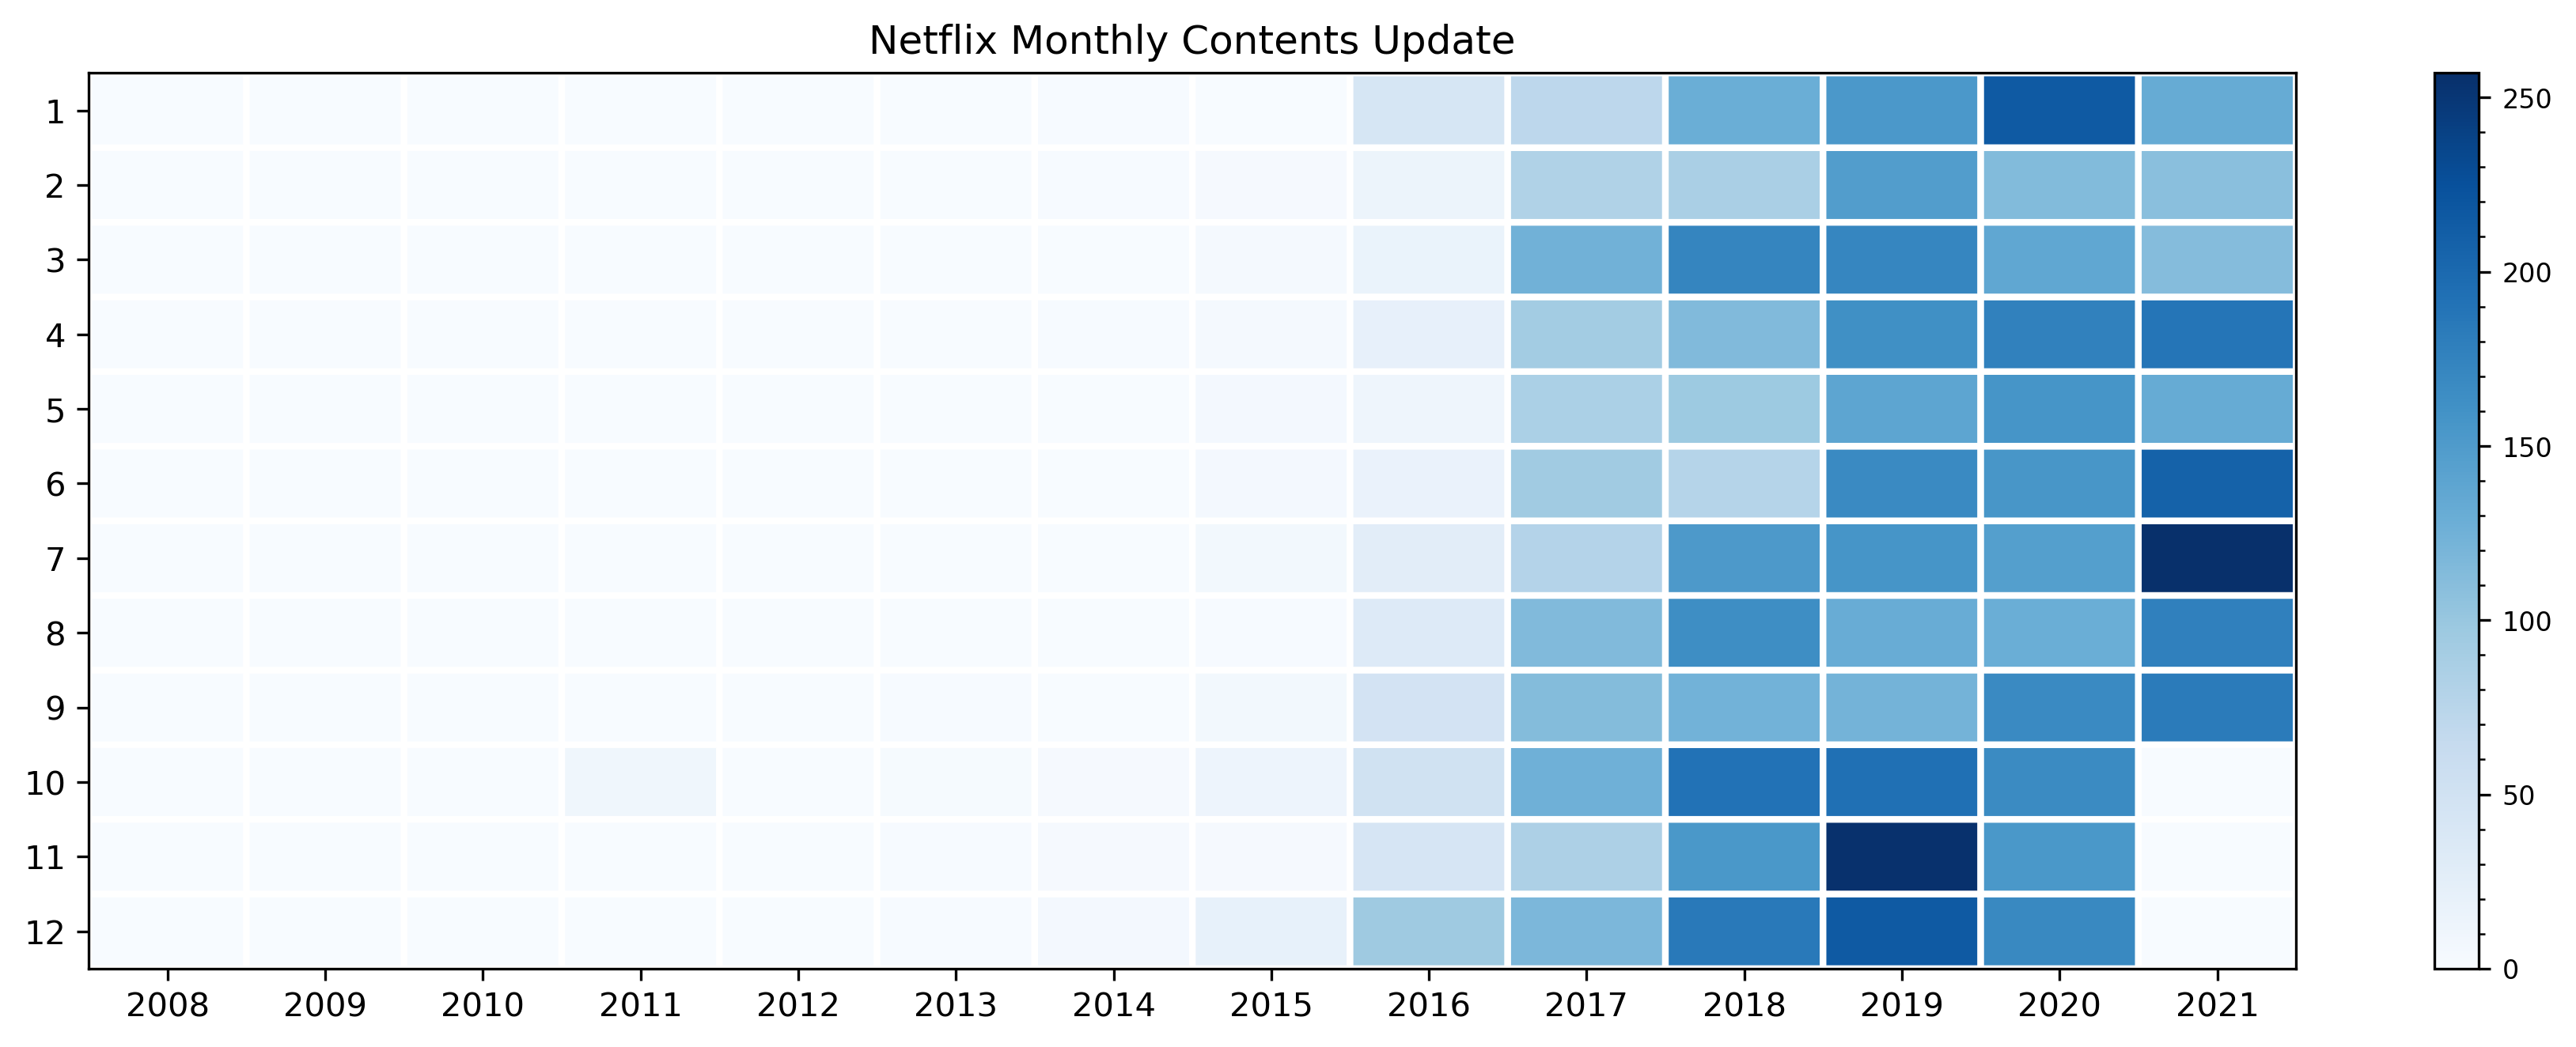

In [236]:
month_order = [1,2,3,4,5,6,7,8,9,10,11,12][::-1]
month_HM = netflix.groupby('year_added')['month_added'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(15, 5), dpi=300)
plt.pcolor(month_HM, cmap='Blues', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(month_HM.columns), 1), month_HM.columns, fontsize=10)
plt.yticks(np.arange(0.5, len(month_HM.index), 1), month_HM.index, fontsize=10)
plt.title('Netflix Monthly Contents Update', fontsize=12)
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

### `Insights`
- This heatmap shows that there are more contents being added during the last few months compare to other months.

## Outlier Check

count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64


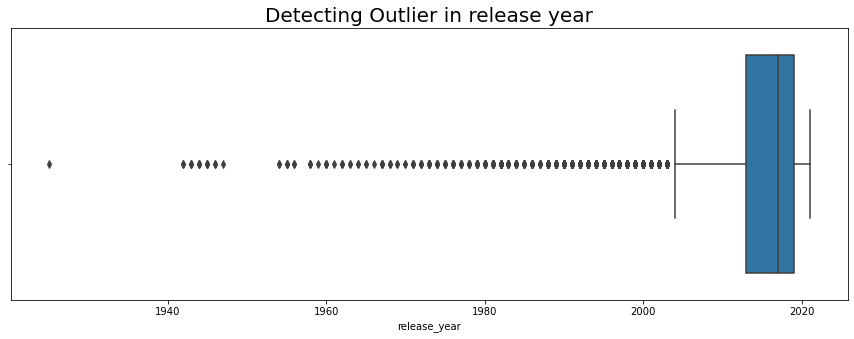

In [237]:
print(netflix["release_year"].describe())
plt.figure(figsize = (15, 5))
sns.boxplot(x = "release_year", data = netflix)
plt.title("Detecting Outlier in release year", size = 20)
plt.show()

### `Insights` 
- We can see movies released `before 1955` is outlier for the given dataset

        year_added
count  8807.000000
mean   2018.873169
std       1.573808
min    2008.000000
25%    2018.000000
50%    2019.000000
75%    2020.000000
max    2021.000000


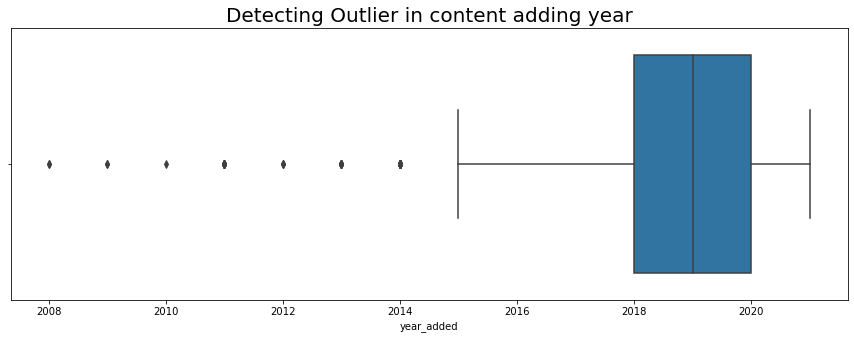

In [238]:
print(netflix[["year_added", ]].describe())
plt.figure(figsize = (15, 5))
sns.boxplot(x = "year_added", data = netflix)
plt.title("Detecting Outlier in content adding year", size = 20)
plt.show()

### `Insights` 
- We can see movies added `before year 2015` is outlier for the given dataset

       month_added
count  8807.000000
mean      6.648575
std       3.439879
min       1.000000
25%       4.000000
50%       7.000000
75%      10.000000
max      12.000000


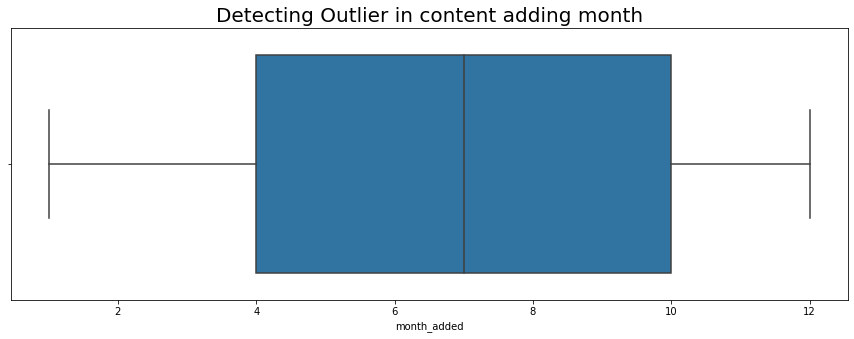

In [239]:
print(netflix[["month_added", ]].describe())
plt.figure(figsize = (15, 5))
sns.boxplot(x = "month_added", data = netflix)
plt.title("Detecting Outlier in content adding month", size = 20)
plt.show()

### `Insights`
- Great!! We didn't find any outlier in content adding in month

count    6131.000000
mean       99.564998
std        28.289504
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64


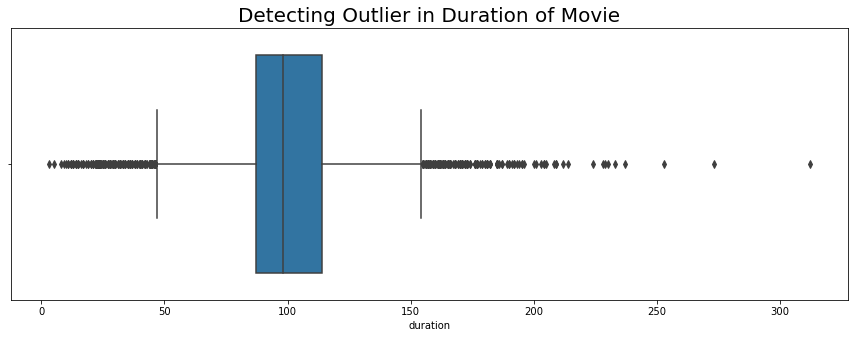

In [240]:
print(netflix.loc[netflix["type"] == "Movie"]["duration"].describe())
plt.figure(figsize = (15, 5))
sns.boxplot(x = netflix.loc[netflix["type"] == "Movie"]["duration"], data = netflix)
plt.title("Detecting Outlier in Duration of Movie", size = 20)
plt.show()

### `Insights`
- There is significant outlier found in both ways in duration of `movies`. 
- Outlier observed for the movies duration `less than 47 Minutes` and `Greater than 153 Minutes`

count    2676.000000
mean        1.764948
std         1.582752
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: duration, dtype: float64


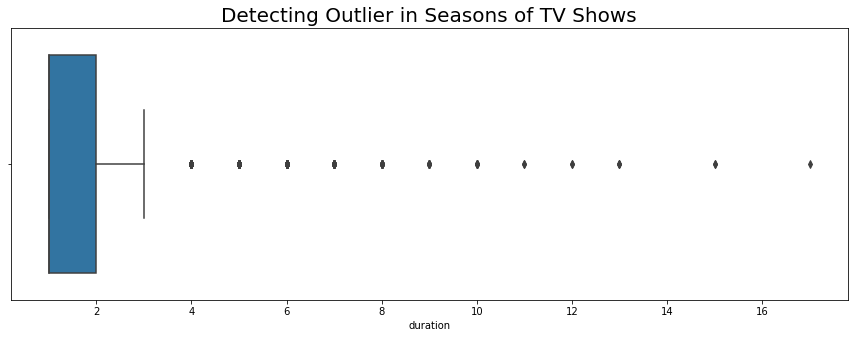

In [241]:
print(netflix.loc[netflix["type"] == "TV Show"]["duration"].describe())
plt.figure(figsize = (15, 5))
sns.boxplot(x = netflix.loc[netflix["type"] == "TV Show"]["duration"], data = netflix)
plt.title("Detecting Outlier in Seasons of TV Shows", size = 20)
plt.show()

### `Insights`
- Outlier observed for the no. of seasons `greater than 3` for TV Shows

## Question 7: Business Insights

### As per all EDA and Visualizaiton. Let's summarize the major insights of  the Dataset

- The movies accounts for majority of the content unlike TV Shows.
- Initially, the rate of addition of TV shows and movies seems to be at the same pace.
- In 2020, there is a slight increase in the rate of addition of TV shows and a slight reduction in rate of addition of movies which may be a factor of the COVID-19 pandemic.
- TV-MA is the most popular rating for Mature movie, and for teens movie, TV-14 has about 3 times more than PG-13 movie.
- United States, India and United Kingdom is the top 3 countries with the most content.
- As an aspired producer or actor/actress, we might consider this 3 countries for our career.
- The duration for movies are distributed normally where the peak are in the range between 90 and 100 minutes.
- Most of the TV show consist of 1 season only.
- The top 3 favourite genre of movies are:
    - International movies
    - Dramas
    - Comedies
- The top 3 favourite TV shows genre are:
    - International TV Shows
    - TV Dramas
    - TV Comedies
- There are outliers detected in release year, Duration of Content, Year when content been added
- There are more contents being added during the last few months compare to other months.
- From year 2015 to 2018 both categories shows growing trend
- After year 2018 there is significant drop observed may be due to covid
- Most of the content lies under Adults rating age
- In recent year TV shows showing growing trend irrespective of global pandemic
- In recent year Movies shows down trend.
- We can say that, Netflix has more focus on TV Shows than movies in recent years
- Most of the contents being added in year 2019

## Question 8. Recommendations

### As per all EDA and Visualizaiton, here is the list of actionable recommendations backed by insights and findings

- There is sudden down trend observed in the movies categories unlike TV Shows. And there is shifting of interest observed among user. So businees need to focus on adding more TV Show.
- Distribution of content in different countries are not uniform. Countries like - US, India & UK grossing the chart for more content and release. There is huge opportunities to grow businees in other underperforming countries like `Uraguay`,  `East Germary`, `Equador`, `Ghana` etc.
- Company need to promote more regional contents
- Contents rating are also not uniform - majorly contents are availble of adults and teens. But there is huge scope of business in kids domain also.
- Most of the content is available in Dramas, International movies & comedies genre. Intl. movies genre brings more users on the platform because of its wider audience. 
- There is wider gap in audience for UR rating and TV-MA & TV-19. Company should focus more on UR rating content to attract more users
- Trends for TV shows is quite giving positive intent but this can be more improved by adding more content related to other performing rated contents like - TV Documentaries, Dramas, Critics etc.
- We see down trend in month of February for content adding with respect to other months. Company can improve this 